# Problem Set 7: Unsupervised Learning and Facial Recognition

<span style="color:red">Warning!</span> Some of the problems in this problem set require heavy computation - you are encouraged to start early so that you don't get stuck at the last minute.

# Face Recognition

Your goal for this problem set is to explore the basics of a face recognition system. Since the machine learning force is now strong with you, the prompts for this problem set are deliberately vague. Be creative - but be careful! It my be useful to start by implementing this entire problem set on a relatively small subset of all of the images first, before using the full dataset.

## 1. Data Preprocessing and  Exploration

Download the "[Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)" data set from [this link](http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz) (roughly 250MB).

### 1.1. Filter out people with few images

First, display a histogram that shows the number of images per individual (you may use log-scale if you like). Which individual has the most images from your dataset?

Now, remove all individuals for whom you have fewer than 10 images. How many individuals are you left with in the dataset?

In [1]:
!wget http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz

--2024-05-03 04:23:53--  http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz
Resolving vis-www.cs.umass.edu (vis-www.cs.umass.edu)... 128.119.244.95
Connecting to vis-www.cs.umass.edu (vis-www.cs.umass.edu)|128.119.244.95|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 243346528 (232M) [application/x-gzip]
Saving to: ‘lfw-funneled.tgz’

lfw-funneled.tgz    100%[===================>] 232.07M  1.77MB/s    in 90s     

2024-05-03 04:25:22 (2.59 MB/s) - ‘lfw-funneled.tgz’ saved [243346528/243346528]



In [2]:
# import os
# os.getcwd()
# !tar -xzf lfw-funneled.tgz
import tarfile
tgz_path = 'lfw-funneled.tgz'

if tarfile.is_tarfile(tgz_path):
    with tarfile.open(tgz_path, "r:gz") as tar:
        tar.extractall()
        print("Files extracted:")
else:
    print("The uploaded file is not a valid tar.gz file.")

!ls

Files extracted:
dog.jpg  lfw_funneled  lfw-funneled.tgz  me4.jpg  sample_data


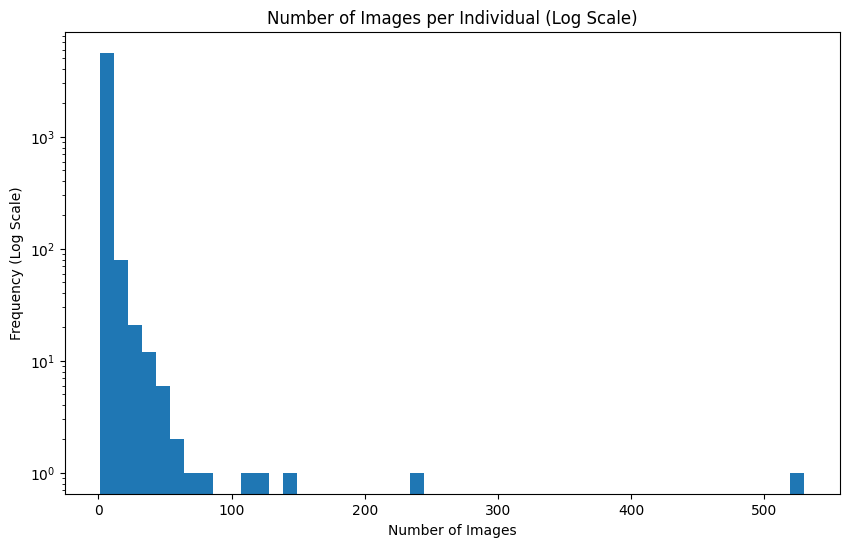

Individual with the most images: George_W_Bush with 530 images.
Number of all individuals: 5749
Number of individuals with at least 10 images: 158
         Individual  Image Count
7      Bill_Clinton           29
19      Tom_Daschle           25
42     Nancy_Pelosi           15
115    Hamid_Karzai           22
129  Angelina_Jolie           20


In [3]:
# Your code here
import os
import pandas as pd
import matplotlib.pyplot as plt

dataset_path = 'lfw_funneled'
images_per_individual = {}

for individual in os.listdir(dataset_path):
    individual_path = os.path.join(dataset_path, individual)
    if os.path.isdir(individual_path):
        num_images = len([name for name in os.listdir(individual_path) if name.endswith('.jpg')])
        images_per_individual[individual] = num_images

data = pd.DataFrame(list(images_per_individual.items()), columns=['Individual', 'Image Count'])


plt.figure(figsize=(10, 6))
plt.hist(data['Image Count'], bins=50, log=True)
plt.title('Number of Images per Individual (Log Scale)')
plt.xlabel('Number of Images')
plt.ylabel('Frequency (Log Scale)')
plt.show()

max_images_individual = data.loc[data['Image Count'].idxmax()]
print(f"Individual with the most images: {max_images_individual['Individual']} with {max_images_individual['Image Count']} images.")


filtered_data = data[data['Image Count'] >= 10]

print(f"Number of all individuals: {len(data)}")
print(f"Number of individuals with at least 10 images: {len(filtered_data)}")

print(filtered_data.head(5))

lfw_funneled/George_W_Bush


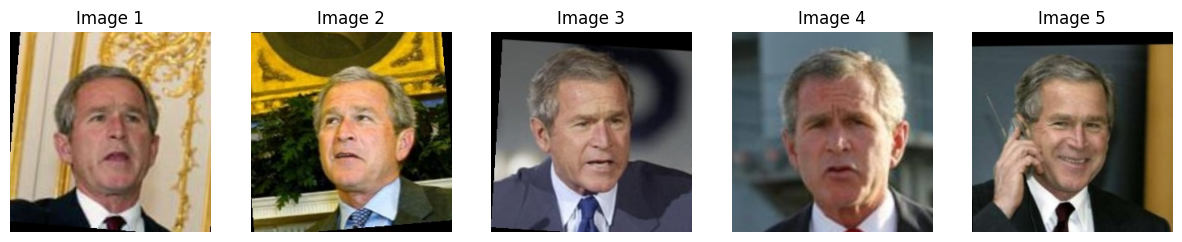

In [4]:
from PIL import Image

max_images_person = 'George_W_Bush'
# print(os.getcwd())
# Full path to the directory containing this person's images
person_path = os.path.join(dataset_path, max_images_person)
print(person_path)
# if os.path.isdir(person_path):
images = os.listdir(person_path)
images = [img for img in images if os.path.isfile(os.path.join(person_path, img))]
num_images_to_show = 5
plt.figure(figsize=(15, 10))

for i, image_filename in enumerate(images[:num_images_to_show]):
    img_path = os.path.join(person_path, image_filename)
    img = Image.open(img_path)

    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Image {i+1}')

plt.show()
# else:
#   print("failed")

*Your comments here*  
Individual with the most images: George_W_Bush with 530 images.  
Number of all individuals: 5749  
Number of individuals with at least 10 images: 158

### 1.2. Show some faces!

1. Pick 10 random images from the dataset and display them in a 2 x 5 grid.
2. This time pick 200 random images. Create a single image that shows the "average face" over this random sample -- i.e. each pixel should display the average value of that particular pixel across the random sample.

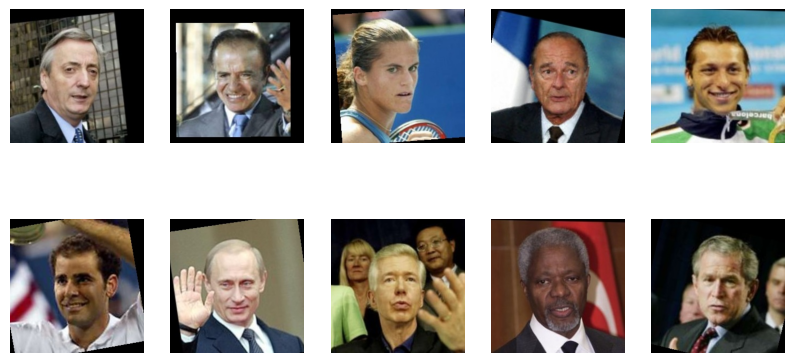

In [5]:
# Your code here
import numpy as np
import random
all_images = []
for individual in filtered_data['Individual']:
    individual_path = os.path.join(dataset_path, individual)
    for img_file in os.listdir(individual_path):
        if img_file.endswith('.jpg'):
            all_images.append(os.path.join(individual_path, img_file))
# now we get all the paths of filtered_data
# pick 10 randam images
random_images = random.sample(all_images, 10)
plt.figure(figsize=(10, 5))
for i, img_path in enumerate(random_images):
    img = Image.open(img_path)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

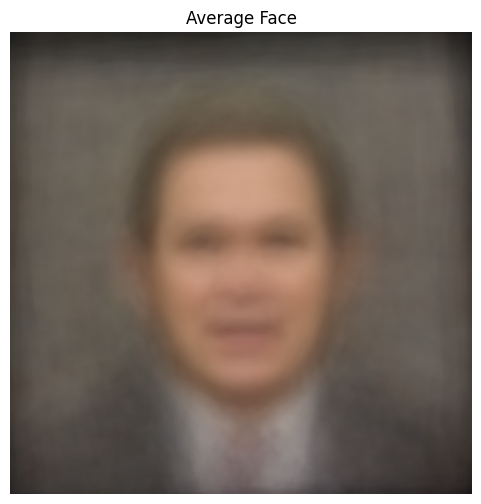

In [24]:
# pick 200 randam images.
random_images = random.sample(all_images, 200)
sum_img = None
for img_path in random_images:
    img = Image.open(img_path).convert('RGB')
    img_arr = np.array(img)
    if sum_img is None:
        sum_img = np.zeros_like(img_arr, dtype=np.float64)
    sum_img += img_arr

# create a single image showing the"average face" over this random sample
average_face = (sum_img / 200).astype(np.uint8)
average_face_img = Image.fromarray(average_face)

# print("average_face:",average_face)
plt.figure(figsize=(6, 6))
plt.imshow(average_face_img)
plt.axis('off')
plt.title("Average Face")
plt.show()

## 2. k-Means Clustering


### 2.1. Implementation

Implement the k-Means clustering algorithm that we discussed in class, using the Euclidean distance function. This will require that you define three new functions:
1. InitializeCentroids(X, k)
2. FindClosestCentroids(X, centroids)
3. ComputeCentroidMeans(X, centroids, k)

*Hint:* You may find  the [`pairwise_distances_argmin`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html) function useful.

In [35]:
# Your code here
from sklearn.metrics import pairwise_distances_argmin
def InitializeCentroids(X, k):
    # Initialization: Randomly choose k data points as centroids
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]
def FindClosestCentroids(X, centroids):
    # Assign each data point to the closest centroid
    indices = pairwise_distances_argmin(X, centroids)
    return indices

def ComputeCentroidMeans(X, indices, k):
    # recompute the centroids
    new_centroids = np.array([X[indices == i].mean(axis=0) for i in range(k)])
    return new_centroids

def kMeans(X, k, num_iterations=100, tol=1e-5):
  centroids = InitializeCentroids(X,k)
  prev_centroids = centroids.copy()
  for j in range(num_iterations):
    #1: Find closest centroids
    indices = FindClosestCentroids(X, centroids)

    #2: Compute means and update centroids
    new_centroids = ComputeCentroidMeans(X, indices, k)

    #Check for convergence(if centroids do not change)
    # if np.all(centroids == new_centroids):
    #     break
    # centroids = new_centroids
    centroid_shift = np.linalg.norm(new_centroids - prev_centroids, axis=1).sum()
    if centroid_shift <= tol:
      print(f"the num of iterations until convergence:{j+1}")
      break

    prev_centroids = centroids.copy()
    centroids = new_centroids
  # Calculate SSE
  sse = np.sum([np.sum((X[indices == i] - centroids[i])**2) for i in range(k)])
  print(f"SSE in kmeans is:{sse}")
  return centroids, indices


In [36]:
# example
X = np.random.rand(100, 2)  # 100 points in 2D
k = 3
centroids, assignments = kMeans(X, k)
print("Centroids:\n", centroids)
print("Cluster assignments:", assignments)

the num of iterations until convergence:6
SSE in kmeans is:5.7422965575959495
Centroids:
 [[0.79275082 0.32245119]
 [0.42596965 0.78691923]
 [0.23442365 0.29630531]]
Cluster assignments: [1 0 1 0 0 2 2 0 1 2 0 2 1 0 1 0 1 0 2 1 1 0 2 2 2 1 2 1 0 1 1 0 1 1 2 1 2
 2 2 0 1 2 2 0 1 0 0 0 0 0 2 2 0 2 2 1 1 1 2 0 1 1 0 1 0 2 2 1 1 2 0 1 0 2
 1 1 0 2 1 1 2 1 1 0 2 0 1 0 0 1 0 1 0 0 1 1 1 2 1 1]


### 2.2. Sanity check

Apply your k-Means algorithm to a toy dataset to make sure it works properly. Also create a scatterplot that shows these datapoints, colored by cluster.

the num of iterations until convergence:4
SSE in kmeans is:204.0694384047887


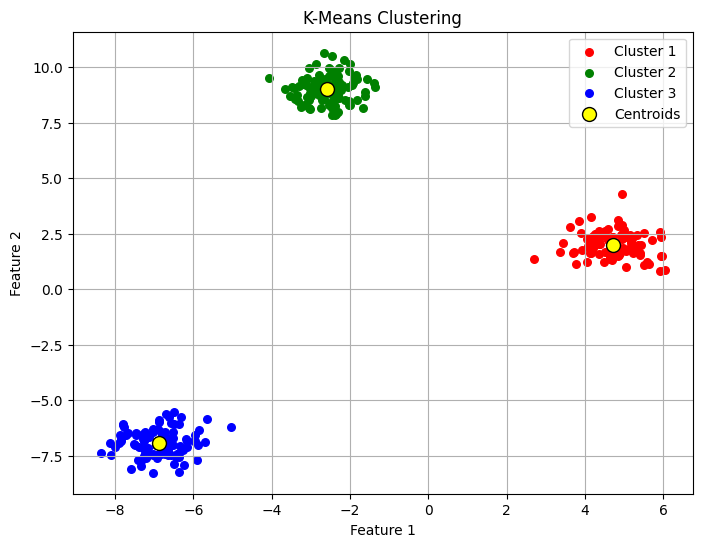

In [37]:
# Your code here
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=0.60)

k = 3
centroids, assignments = kMeans(X, k)

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(k):
    cluster_points = X[assignments == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, color=colors[i], label=f'Cluster {i+1}')

plt.scatter(centroids[:, 0], centroids[:, 1], s=100, color='yellow', edgecolor='black', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

### 2.3. Image centroids
Apply your k-Means algorithm to the images dataset, using k=10. Make sure to standardize your data first! Show a 10 x 2 grid of images where the first column contains (a) the image that represents the centroid for each of those clusters, and the second column contains (b) the closest image in the original dataset to that centroid. Use Euclidean distance. What do you notice?

*Note:* As you may notice, there are 250x250x3 = 187500 features for each image. If your k-Means algorithm is not implemented efficiently -- and even if it is -- it might take a long time for your algorithm to converge. If your computer is slow, it might even take a very long time for you to simply standardize your data. We recommend you convert your RGB images into grayscale first (using, for instance, the [`rgb2grey`](http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2grey) function, or any other way to convert to graysacle) before standardizing.



In [38]:
# Your code here
from skimage.color import rgb2gray
from sklearn.preprocessing import StandardScaler
#function1:loading
def load_images(image_filenames):
    return [Image.open(fname) for fname in image_filenames]
#function2:convert
def convert2gray_np(images):
    return [np.array(img.convert('L')) for img in images]
#function3:standardization
def standardize(images):
    scaler = StandardScaler()
    # images_reshaped = images.reshape(images.shape[0], -1)
    images_reshaped = np.array([np.array(img).flatten() for img in images])
    images_standardized = scaler.fit_transform(images_reshaped)
    return images_standardized
#filtered dataset: all_images(file)
#images: all filtered images(PIL.Image.Image object)
images = load_images(all_images)
#gray_images: array object
gray_images = convert2gray_np(images)
standardized_images = standardize(gray_images)


In [49]:
#apply k-means
k=10
centroids, assignments = kMeans(standardized_images, k)


the num of iterations until convergence:68
SSE in kmeans is:195739015.17772043


int64


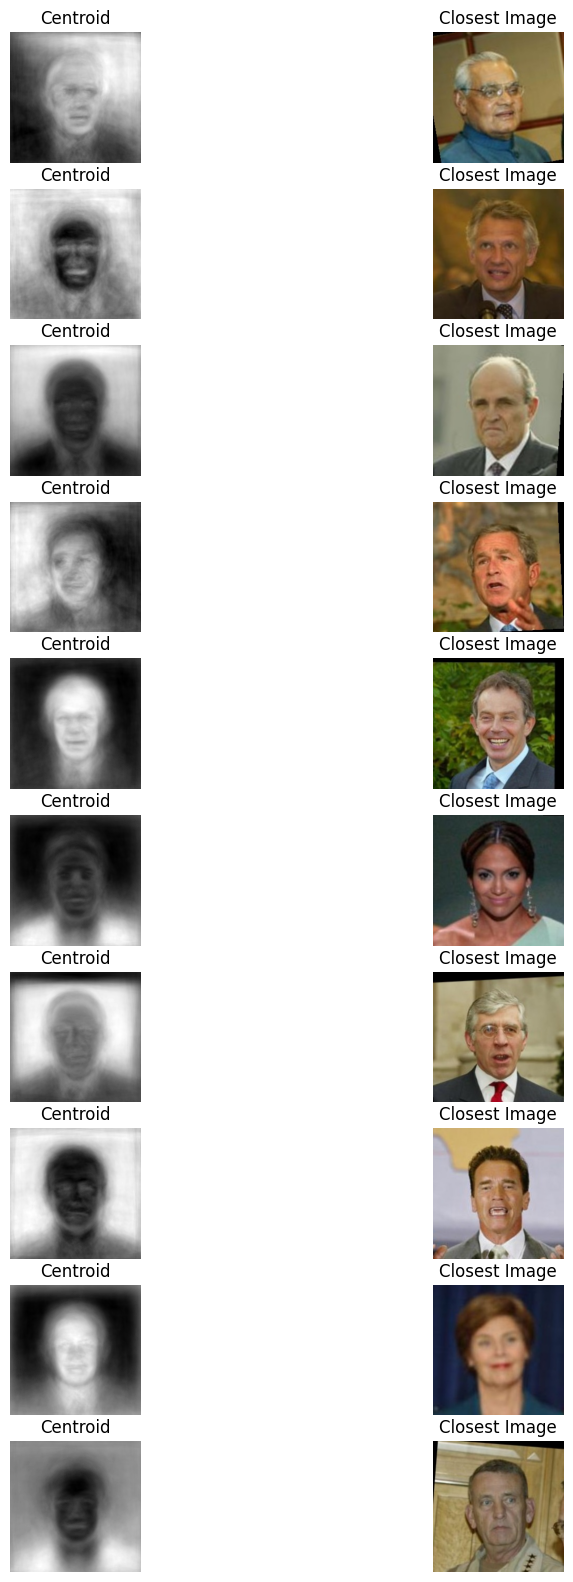

In [50]:
#Finding closest images to centroids
closest_indices = pairwise_distances_argmin(centroids, standardized_images)
print(closest_indices.dtype)
closest_images = [images[i] for i in closest_indices]
# centroids_images = [Image.fromarray(centroid.reshape(250, 250)) for centroid in centroids]

# Plotting
fig, axs = plt.subplots(nrows=10, ncols=2, figsize=(10, 20))
for i in range(10):
    # Display centroid
    ax = axs[i, 0]
    ax.imshow(centroids[i].reshape(250, 250), cmap='gray')  # Directly use the numpy array
    ax.axis('off')
    ax.set_title('Centroid')

    # Display closest image
    ax = axs[i, 1]
    ax.imshow(closest_images[i], cmap='gray')  # Assuming closest_images are also numpy arrays
    ax.axis('off')
    ax.set_title('Closest Image')
plt.show()

*Your comments here*  
It took 54 iterations for my kMeans to converge.  
Those closest images look very similar to the corresponding centroids, which can give insights into the quality of the clustering.  
The centroids look different with each other, which indicate the quality of clustering.  
The centroid images (column A) represent the average features of all the images within that cluster. These images typically appear more blurred or less defined compared to actual images because they average the pixel values of all images assigned to that cluster.

### 2.4 Classify yourself

Take a picture of yourself and scale it so that it is in a similar format to the images in the dataset. Show four images:
 1. The image of yourself.
 2. The cluster centroid closest to that image.
 3. The closest image in the dataset to that cluster centroid.
 4. The closest image in the dataset to the image of yourself.


62500
(250, 250) (10, 62500)


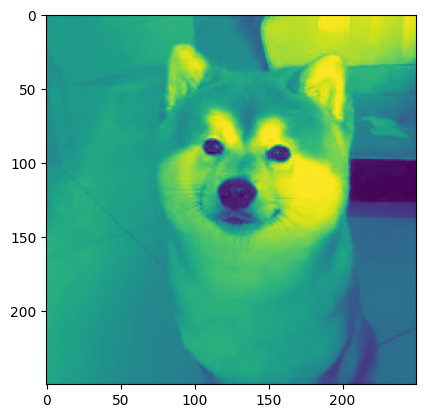

In [41]:
# Your code here
myimg = Image.open("dog.jpg")
myimg = myimg.convert('L')
myimg = np.array(myimg)
print(myimg.size)
# myimg = myimg.reshape(250,250)
plt.imshow(myimg)
def standardize2(images):
    scaler = StandardScaler()
    images_reshaped = images.reshape(images.shape[0], -1)
    standardized_images = scaler.fit_transform(images_reshaped)
    return standardized_images
std_myimg = standardize2(myimg)
print(std_myimg.shape, centroids.shape)
std_myimg = std_myimg.flatten().reshape(1,-1)
# get centroids from above
# Find the closest centroid to your image
closest_centroid_idx = pairwise_distances_argmin(std_myimg, centroids)

# Find the closest image in the dataset to the centroid
closest_image_to_centroid_idx = pairwise_distances_argmin(centroids[closest_centroid_idx], standardized_images)

# Find the closest image in the dataset to my image
closest_image_to_my_idx = pairwise_distances_argmin(std_myimg, standardized_images)

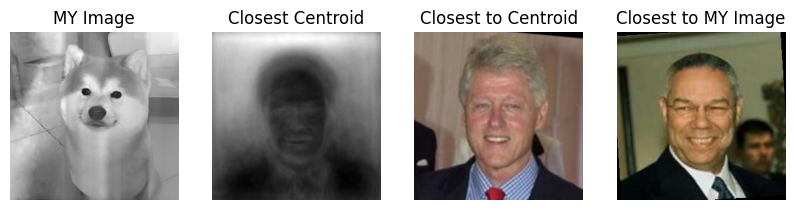

In [42]:
#plotting
def show_images(images, titles):
    plt.figure(figsize=(10, 2.5))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 4, i + 1)
        # print(i)
        if i == 0:
          plt.imshow(image.reshape(250, 250),cmap='gray')
        else:
          plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()
# print(closest_image_to_centroid_idx)
# Prepare images and titles for display
centroid_idx = closest_image_to_centroid_idx[0]
images_to_show = [
    std_myimg,
    centroids[closest_centroid_idx].reshape(250, 250),
    images[centroid_idx],
    images[closest_image_to_my_idx[0]]
]
titles = ["MY Image", "Closest Centroid", "Closest to Centroid", "Closest to MY Image"]
show_images(images_to_show, titles)

### 2.5. (Extra credit): k-Means++
- In 2.1 you implemented k-Means clustering with random initialization of the centroids. In this part implement the k-Means++ version of the algorithm that uses a "smarter" initialization of the centroids in order to achieve faster convergence. Compare the number of iterations it took k-Means in 2.3 to converge with random initialization to the number of iterations it takes k-Means++. Also compare the sum of squared errors that you obtain for both methods. Use for both k=20 clusters. The following link shows the paper that proposed k-Means++.
http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf

In [43]:
# Your code here
def kmeans_pro(X, k, num_iterations=100, tol=1e-5):
  n_samples, n_features = X.shape
  centroids = np.empty((k, n_features),dtype=X.dtype)
  #step1a: randomly choose the first centroid
  first_idx = np.random.randint(0, n_samples)
  centroids[0] = X[first_idx]
  #step1b&1c: choose the remaining centroids
  closest_dist = np.full(n_samples,np.inf)
  for i in range(1,k):
    # Update the distance from each point to the closest centroid
    dist_sq = np.sum((X - centroids[i - 1])**2, axis=1)
    closest_dist = np.minimum(closest_dist, dist_sq)

    # Choose the next centroid with D^2 weighting
    probabilities = closest_dist / closest_dist.sum()
    cumulative_probabilities = np.cumsum(probabilities)
    next_centroid_idx = np.searchsorted(cumulative_probabilities, np.random.random())

    centroids[i] = X[next_centroid_idx]
    # return centroids
  prev_centroids = centroids.copy()
  for i in range(num_iterations):
    #1: Find closest centroids
    indices = FindClosestCentroids(X, centroids)

    #2: Compute means and update centroids
    new_centroids = ComputeCentroidMeans(X, indices, k)

    #Check for convergence(if centroids do not change)
    # if np.all(centroids == new_centroids):
    centroid_shift = np.linalg.norm(new_centroids - prev_centroids, axis=1).sum()
    if centroid_shift <= tol:
      print(f"the num of iterations until convergence:{i+1}")
      break

    prev_centroids = centroids.copy()
    centroids = new_centroids
  # Calculate SSE
  sse = np.sum([np.sum((X[indices == i] - centroids[i])**2) for i in range(k)])
  print(f"SSE in kmeans++ is:{sse}")
  return centroids, indices

In [44]:
k=20
centroids, assignments = kmeans_pro(standardized_images, k)

the num of iterations until convergence:41
SSE in kmeans++ is:184333445.6258227


In [45]:
centroids_0, assignments_0 = kMeans(standardized_images, k)

the num of iterations until convergence:68
SSE in kmeans is:184686744.55305153


*Your comments here*  
kMeans++ got better performance here both in the iteration speed and the SSE. Actually, I came across a problem when doing this question. My kMeans++ performed worse first and I didn't know why. Then, I reduced the tolerance for convergence, then kMeans++ performed better, which indicates that kMeans++ has better accuracy.

## 3. PCA and Eigenfaces

Ensure you are using standardized data. Then, set aside 50% of the images as "test" data and using the remaining images as "training" data.


### 3.1. How many components?

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn on the training dataset. Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 100. How many components are required to explain 75% of the variation in your original data?

In [29]:
# Your code here
# set up the training and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(standardized_images, test_size=0.5, random_state=42)


In [30]:
# perfom PCA
from sklearn.decomposition import PCA

# initialize PCA and fit it into the training data
pca = PCA(n_components=100)
pca.fit(X_train)

variances = np.cumsum(pca.explained_variance_ratio_)

components_nd = np.argmax(variances>=0.75)+1
print(f"Number of components to explain 75% of variance: {components_nd}")

Number of components to explain 75% of variance: 45


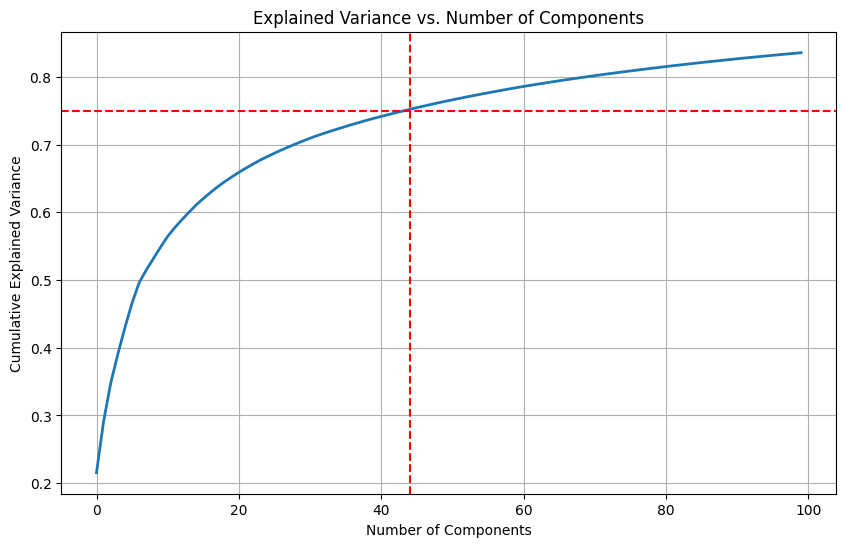

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(variances, linewidth=2)
plt.axhline(y=0.75, color='r', linestyle='--')
plt.axvline(x=components_nd - 1, color='r', linestyle='--')  # -1 because the index starts at 0
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

*Your comments here*  
45 components are needed.

### 3.2. The Eigenfaces

Extract the 10 first principal components (the "eigenfaces") and display them below.

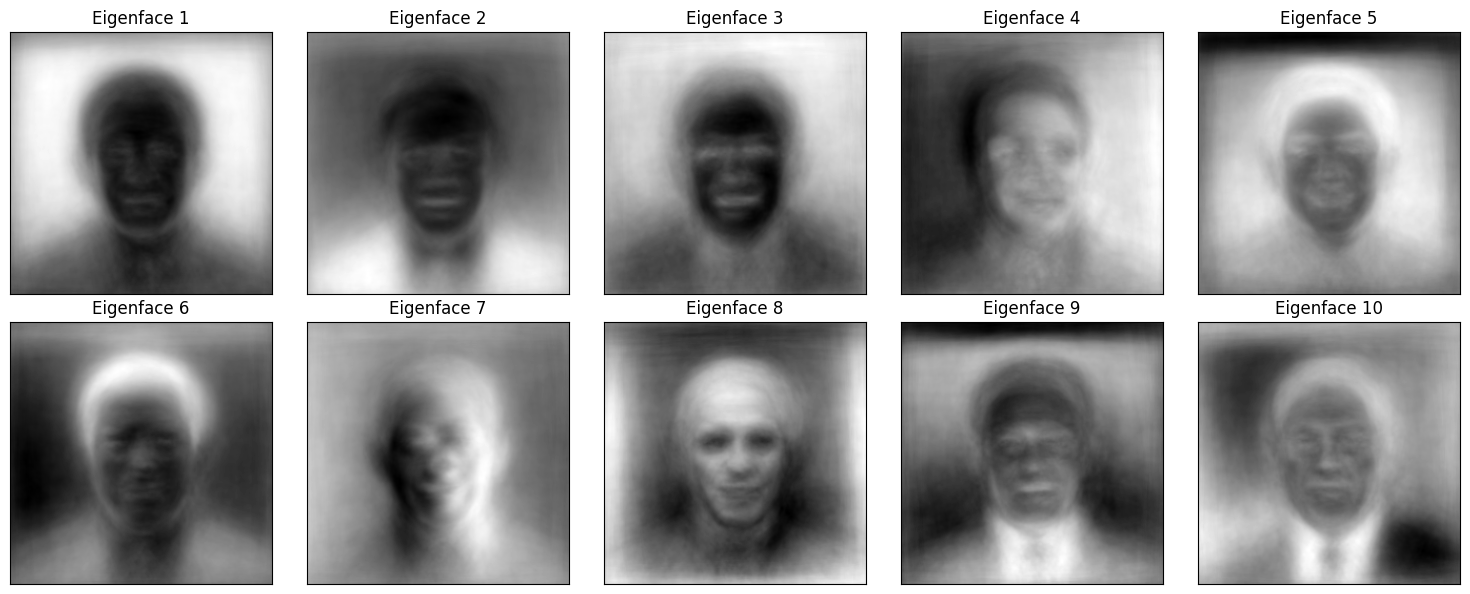

In [32]:
# Your code here
# Extract the first 10 principal components
# pca = PCA(n_components=10)
# pca.fit(X_train)
##or
eigenfaces = pca.components_[:10].reshape((10, 250, 250))
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(eigenfaces[i], cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(f'Eigenface {i+1}')
plt.tight_layout()
plt.show()


### 3.3. Projections, clustering and PCA
 - Project all of the training and test data into the 40-dimensional space defined by the first 40 principal components.
 - Apply k-means clustering, with k=16, to the 40-dimensional projections of the training data.
 - Display a 4 x 4 grid of images that shows what each of the 16 centroids look like after the centroid is projected back into the original-image space.

the num of iterations until convergence:25
SSE in kmeans is:58595322.01709081


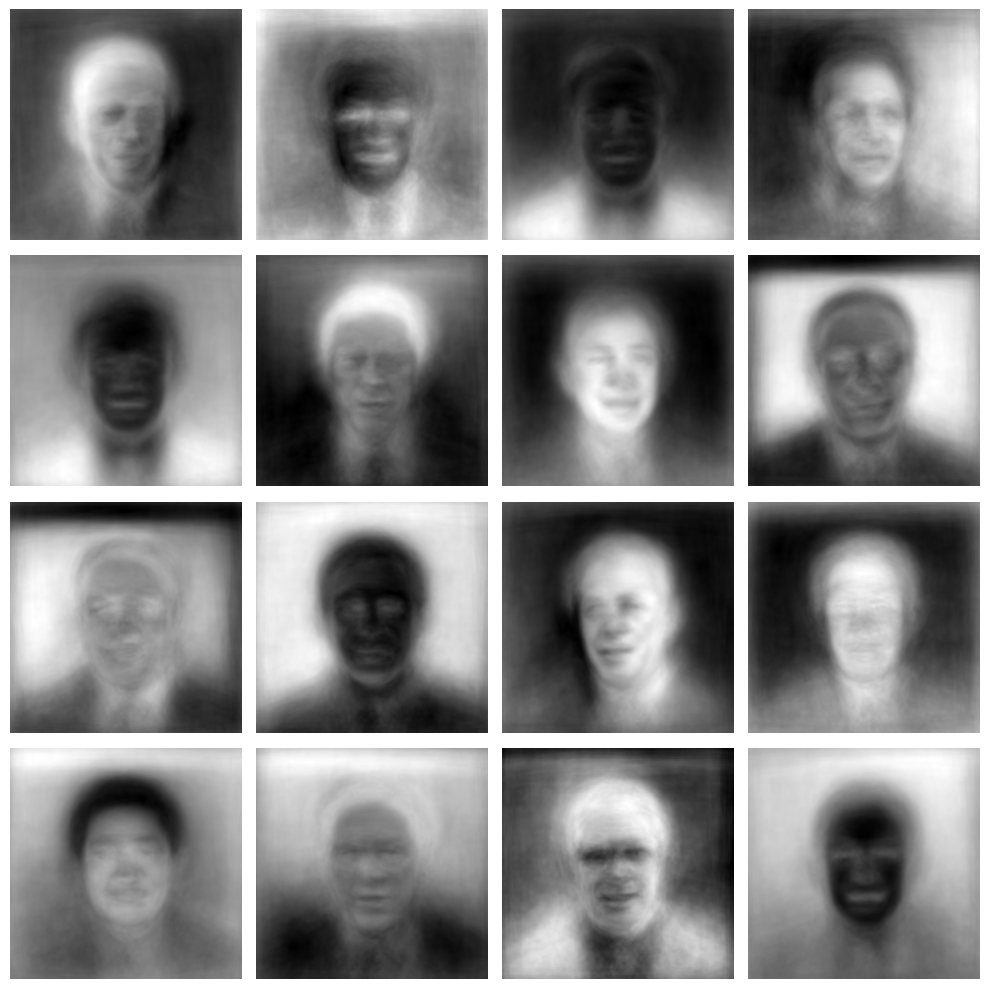

In [46]:
# Your code here
# project to 40-dims space using pca
from sklearn.cluster import KMeans
pca3_3 = PCA(n_components=40)
pca3_3.fit(X_train)

X_train_pca = pca3_3.transform(X_train)
X_test_pca = pca3_3.transform(X_test)

# step2: apply kmeans
# kms = KMeans(n_clusters=16, random_state=42)
# kms.fit(X_train_pca)
centroids_pca, indices = kMeans(X_train_pca, k=16)
## get the centroids in the 40-dims PCA space
# centroids_pca = kms.cluster_centers_

# step3:plotting
# Project centroids back to the original space
centroids = pca3_3.inverse_transform(centroids_pca)
centroids_images = centroids.reshape((16, 250, 250))
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
  ax.imshow(centroids_images[i], cmap='gray')
  ax.axis('off')  # Hide axes for clarity
plt.tight_layout()
plt.show()


### 3.4. (Extra Credit): Recognition

Create a set of 10 images using (i) 8 images randomly selected from the test data, (ii)  any other non-face image you can find that has the right dimensions, and (iii) an image of yourself. Create a 10 x 5 grid of images, with one row for each of these images, and 5 columns that contain:
1. The original image.
2. The reconstruction of that image after it is projected onto the 40-dimensional eigenface-space and then re-projected back into the original image space.
3. Find the nearest centroid (from 3.3) to the image, and show the reconstruction of that nearest centroid.
4. Find the image in the training data whose 40-dimensional representation is closest to that centroid, and show the reconstruction of that image.
5. Show the original training image that was selected in above (step 4 in this list)

Post the five images corresponding to your headshot on piazza to share with the rest of the class.

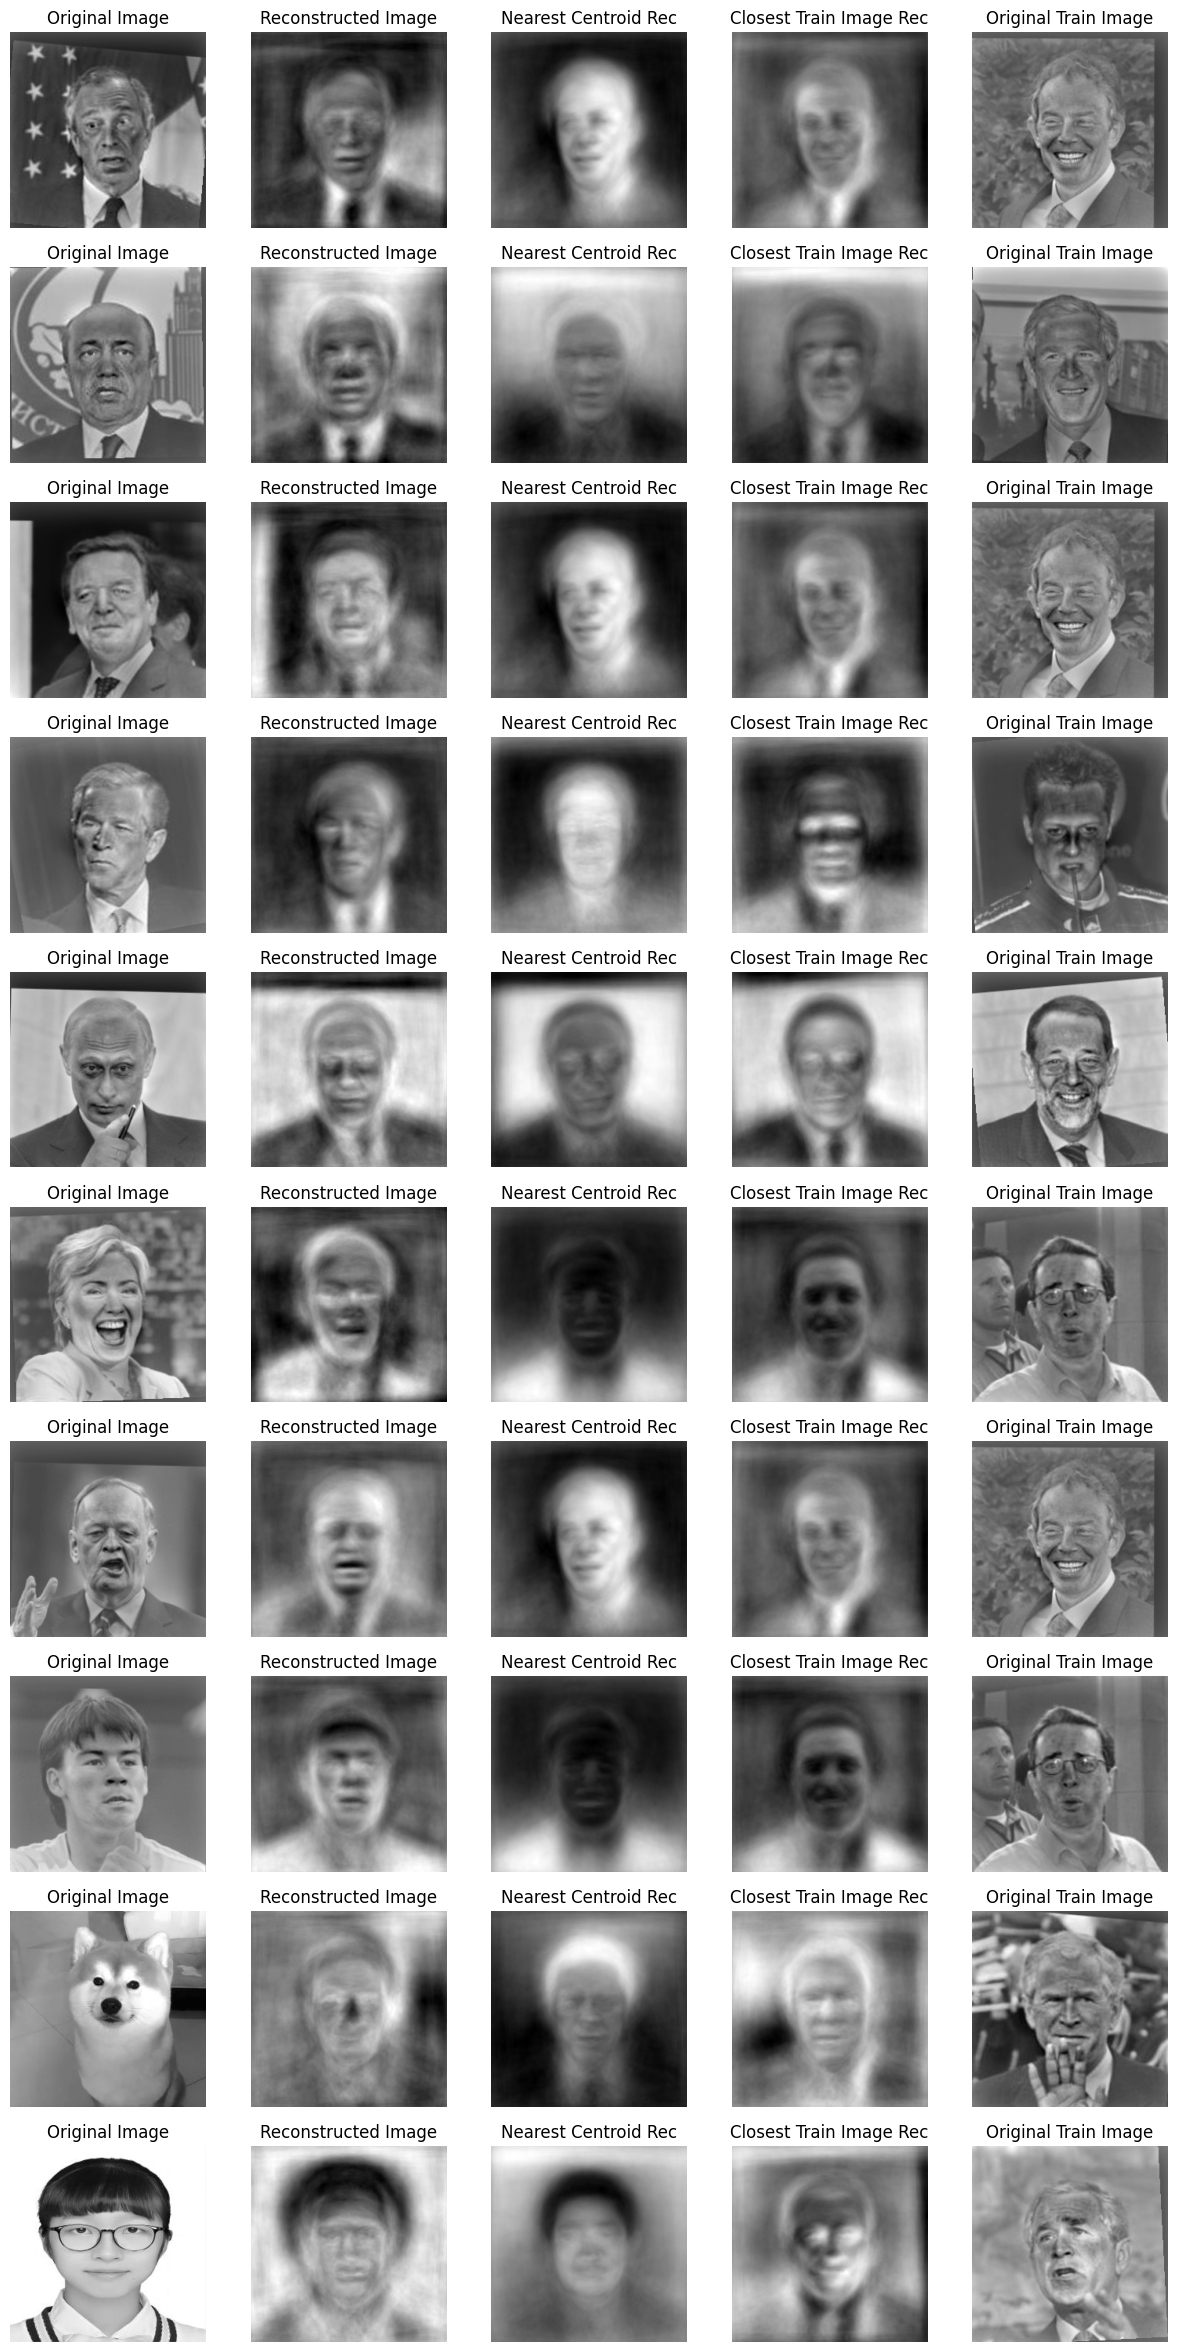

In [47]:
# Your code here
# img1: 8 random images
# img2: non-face img
# img3: my img
def prepare_image(image_path):
  img = Image.open(image_path).convert('L')
  # img = img.resize((250, 250))
  return np.array(img).flatten()  # Flatten to 1D array

rd_img = random.sample(list(X_test),8)
# print(rd_img.shape)

non_face_img = standardize(prepare_image('dog.jpg')).reshape(1,-1)
my_image = standardize(prepare_image('me4.jpg')).reshape(1,-1)
selected_images = np.vstack([rd_img,non_face_img,my_image])  #after flatten

# projection and reconstruction
def reconstruct_image(image, pca):
  projected = pca.transform(image.reshape(1, -1))
  reconstructed = pca.inverse_transform(projected)
  return reconstructed.reshape(250, 250)

# for each img of 10 images
reconstructed_images = [reconstruct_image(img, pca) for img in selected_images]

# find the nearest centroid and show the reconstruction of that centroid
def find_nearest(images, centroids):
    indices = pairwise_distances_argmin(images, centroids)
    return indices

# plotting
fig, axes = plt.subplots(10, 5, figsize=(15, 30))  # 10 rows, 5 columns
for i, (img, rec_img) in enumerate(zip(selected_images, reconstructed_images)):
  # Original image
  axes[i, 0].imshow(img.reshape(250, 250), cmap='gray')
  axes[i, 0].set_title("Original Image")
  axes[i, 0].axis('off')

  # Reconstructed image
  axes[i, 1].imshow(rec_img, cmap='gray')
  axes[i, 1].set_title("Reconstructed Image")
  axes[i, 1].axis('off')

  # Reconstruction of nearest centroid
  # nearest_centroid_idx = find_nearest([rec_img.flatten()], kmeans.cluster_centers_)[0]
  nearest_centroid_idx = find_nearest([rec_img.flatten()], centroids)[0]
  # nearest_centroid_rec = reconstruct_image(kmeans.cluster_centers_[nearest_centroid_idx], pca)
  nearest_centroid_rec = reconstruct_image(centroids[nearest_centroid_idx], pca3_3)
  axes[i, 2].imshow(nearest_centroid_rec, cmap='gray')
  axes[i, 2].set_title("Nearest Centroid Rec")
  axes[i, 2].axis('off')

  # Closest training image to that centroid
  # nearest_train_idx = find_nearest([kmeans.cluster_centers_[nearest_centroid_idx]], X_train_pca)[0]

  nearest_train_idx = find_nearest(centroids_pca[nearest_centroid_idx].reshape(1,-1),X_train_pca)[0]
  nearest_train_rec = reconstruct_image(X_train[nearest_train_idx], pca3_3)
  axes[i, 3].imshow(nearest_train_rec, cmap='gray')
  axes[i, 3].set_title("Closest Train Image Rec")
  axes[i, 3].axis('off')

  # Original of the closest training image
  axes[i, 4].imshow(X_train[nearest_train_idx].reshape(250, 250), cmap='gray')
  axes[i, 4].set_title("Original Train Image")
  axes[i, 4].axis('off')

plt.show()